In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.optimize
from math import *

In [2]:
def sampleGenerater(N, sigma_noise, W_true):
    Ux = 2*np.random.rand(N) - 1   
    X = np.zeros((4,N))       
    X[0] = Ux**3         
    X[1] = Ux**2
    X[2] = Ux
    X[3] = np.ones(N)
    y = np.dot(W_true, X) + np.random.normal(0, sigma_noise, N)
    return Ux, y, X

In [3]:
def MAP(W_est):
    global N
    global X_mat
    global y
    global i
    global sigma_noise
    class_conditional_part = 0
    prior = 0
    for k in range(N):
        class_conditional_part += sigma_noise**(-2) * (y[k] - np.dot(W_est, X_mat[:,k]))**2
    prior = i**(-2) * np.dot(W_est, np.transpose(W_est))
    
    return class_conditional_part + prior

In [4]:
#ture para
sigma_noise = 0.1                 
const = 1                             
N = 10                            
r = np.array([-1, 0, 1])      
exp_time = 100             

W_true = np.zeros(4)
W_true[0] = const
W_true[1] = -(r[0] + r[1] + r[2])
W_true[2] = r[0]*r[1] + r[0]*r[2] + r[1]*r[2]
W_true[3] = -(r[0]*r[1]*r[2])

In [5]:
#intializing 
counter = 0
num_sigma_prior = 30                          
err_min = np.zeros(num_sigma_prior)
err_25 = np.zeros(num_sigma_prior)
err_median = np.zeros(num_sigma_prior)
err_75 = np.zeros(num_sigma_prior)
err_max = np.zeros(num_sigma_prior)
sigma_prior = 10**np.linspace(-3, 3, num_sigma_prior)

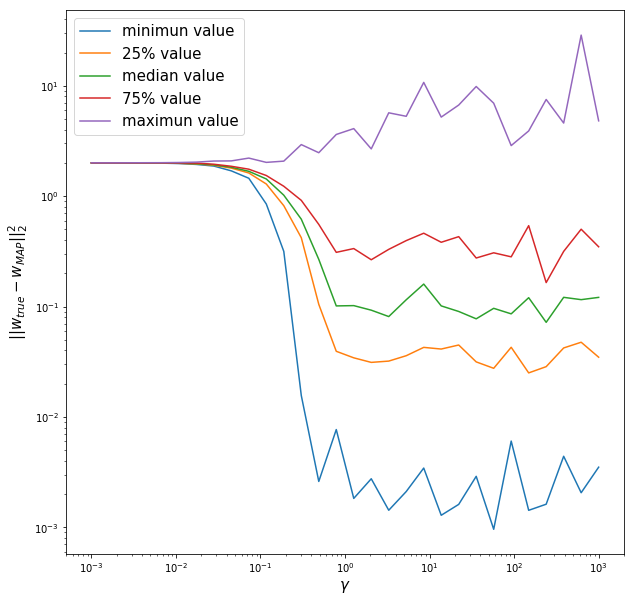

In [6]:
for i in sigma_prior:                          
    error_L2 = np.zeros(exp_time)           
    for j in range(exp_time):      
        Ux, y, X_mat = sampleGenerater(N, sigma_noise, W_true)
        W_est = scipy.optimize.fmin(MAP, np.array([1,0,0,0]), disp=False)
        error_L2[j] = np.dot(np.transpose(W_est - W_true), W_est - W_true)
    error_L2_sorted = sorted(error_L2)
    err_min[counter] = error_L2_sorted[0]
    err_25[counter] = error_L2_sorted[int (0.25*exp_time-1)]
    err_median[counter] = error_L2_sorted[int(0.5*exp_time-1)]
    err_75[counter] = error_L2_sorted[int(0.75*exp_time-1)]
    err_max[counter] = error_L2_sorted[exp_time-1]
    counter += 1
plt.figure(figsize=(10,10))
plt.loglog(sigma_prior, err_min, label = 'minimun value')
plt.loglog(sigma_prior, err_25, label = '25% value')
plt.loglog(sigma_prior, err_median, label = 'median value')
plt.loglog(sigma_prior, err_75, label = '75% value')
plt.loglog(sigma_prior, err_max, label = 'maximun value')
plt.legend(fontsize = 15)
plt.xlabel(r'$\gamma$', fontsize = 15)
plt.ylabel(r'${||w_{true}-w_{MAP}||}^2_2$', fontsize = 15)
plt.show()
